In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [102]:
df= pd.read_csv('Pizza_sales.csv')

In [103]:
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [104]:
total_revenue = df['total_price'].sum()  #df.groupby('order_id')['total_price'].sum()
total_orders =df['order_id'].nunique()
avg_order_value =total_revenue / total_orders #df['total_price'].mean()
print(total_revenue, avg_order_value, total_orders)

817860.05 38.30726229508197 21350


In [105]:
df[df['pizza_id'].isna()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


## Total_pizza_sold

In [106]:
total_pizza_sold = df['quantity'].sum()
total_pizza_sold

49574

#### average pizza per order

In [107]:
avg_pizza_in_order = np.mean(df.groupby('order_id')['quantity'].sum())
avg_pizza_in_order

2.321967213114754

#### hourly trend for ordering pizza

In [108]:
df['order_time']= pd.to_datetime(df['order_time'])
df['hour'] = df['order_time'].dt.hour

hourly_orders= df.groupby(['hour','pizza_category'])['quantity'].sum().sort_values(ascending=False).reset_index()
hourly_orders

/var/folders/b2/0fs1vjfd2t17_06_3v_qqrjm0000gn/T/ipykernel_25970/3835122308.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time']= pd.to_datetime(df['order_time'])


,hour,pizza_category,quantity
0,12,Classic,2039
1,13,Classic,1931
2,12,Veggie,1637
3,18,Classic,1632
4,12,Supreme,1612
5,17,Classic,1608
6,13,Supreme,1549
7,13,Veggie,1501
8,12,Chicken,1488
9,13,Chicken,1432


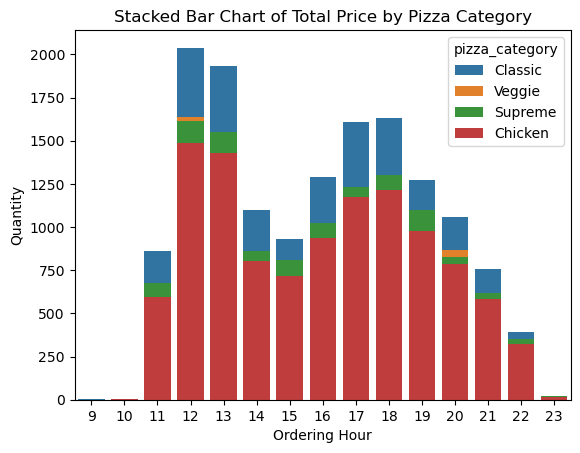

In [109]:
sns.barplot(x='hour', y='quantity',data=hourly_orders,estimator=sum, hue='pizza_category', dodge=False)
plt.xlabel('Ordering Hour')
plt.ylabel('Quantity')
plt.title('Stacked Bar Chart of Total Price by Pizza Category')
plt.show()


### weekly trend for total orders

In [110]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['week'] = df['order_date'].dt.isocalendar().week
df['year'] =  df['order_date'].dt.year




In [111]:
df.groupby(['week','year'])['order_id'].nunique()

week  year
1     2015    254
2     2015    427
3     2015    400
4     2015    415
5     2015    436
6     2015    422
7     2015    423
8     2015    393
9     2015    409
10    2015    420
11    2015    404
12    2015    416
13    2015    427
14    2015    433
15    2015    408
16    2015    414
17    2015    437
18    2015    423
19    2015    399
20    2015    458
21    2015    414
22    2015    390
23    2015    423
24    2015    418
25    2015    410
26    2015    416
27    2015    474
28    2015    417
29    2015    420
30    2015    433
31    2015    419
32    2015    426
33    2015    435
34    2015    407
35    2015    394
36    2015    397
37    2015    435
38    2015    423
39    2015    288
40    2015    433
41    2015    334
42    2015    386
43    2015    352
44    2015    371
45    2015    394
46    2015    400
47    2015    392
48    2015    491
49    2015    424
50    2015    417
51    2015    430
52    2015    298
53    2015    171
Name: order_id, dtype: int64

In [112]:
(df.groupby('pizza_category')['total_price'].sum() / df['total_price'].sum() ) * 100

pizza_category
Chicken    23.955138
Classic    26.905960
Supreme    25.456311
Veggie     23.682591
Name: total_price, dtype: float64

### percentage of sales by pizza size

In [113]:
(df.groupby('pizza_size')['total_price'].sum() / df['total_price'].sum() ) * 100

pizza_size
L      45.890333
M      30.492044
S      21.773468
XL      1.721077
XXL     0.123077
Name: total_price, dtype: float64

### total pizza sold by category

In [114]:
df.groupby('pizza_category')['quantity'].sum()

pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

In [115]:
df.groupby('pizza_category')['order_id'].nunique()


pizza_category
Chicken     8536
Classic    10859
Supreme     9085
Veggie      8941
Name: order_id, dtype: int64

### top 5 best selling pizzas by quantity

In [116]:
pizza_sold =df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False)
pizza_sold.head()

pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

#### least 5 sellling pizza by quantity

In [117]:
pizza_sold.tail()

pizza_name
The Soppressata Pizza        961
The Spinach Supreme Pizza    950
The Calabrese Pizza          937
The Mediterranean Pizza      934
The Brie Carre Pizza         490
Name: quantity, dtype: int64

In [118]:
pizza_sold_revenue =df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False)
pizza_sold_revenue.head()

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64

In [119]:
pizza_sold_revenue.tail()

pizza_name
The Spinach Pesto Pizza      15596.00
The Mediterranean Pizza      15360.50
The Spinach Supreme Pizza    15277.75
The Green Garden Pizza       13955.75
The Brie Carre Pizza         11588.50
Name: total_price, dtype: float64